In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("six.csv")

In [3]:
df

,town,area,price
0,mt,2600,550000
1,mt,3000,565000
2,mt,3200,610000
3,mt,3600,680000
4,mt,4000,725000
5,ww,2600,585000
6,ww,2800,615000
7,ww,3300,650000
8,ww,3600,710000
9,rv,2600,575000


In [4]:
dummies = pd.get_dummies(df.town)

In [5]:
dummies

,mt,rv,ww
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [6]:
merged = pd.concat([df, dummies], axis='columns')

In [7]:
merged

,town,area,price,mt,rv,ww
0,mt,2600,550000,1,0,0
1,mt,3000,565000,1,0,0
2,mt,3200,610000,1,0,0
3,mt,3600,680000,1,0,0
4,mt,4000,725000,1,0,0
5,ww,2600,585000,0,0,1
6,ww,2800,615000,0,0,1
7,ww,3300,650000,0,0,1
8,ww,3600,710000,0,0,1
9,rv,2600,575000,0,1,0


In [8]:
final = merged.drop(['town', 'ww'], axis='columns')

In [9]:
final

,area,price,mt,rv
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
x = final.drop('price', axis='columns')    #we drop price because our x consist of all independent variables
x

,area,mt,rv
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [13]:
y = final['price']

In [14]:
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [15]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
model.predict([[2800,1,0]])

array([565089.22812299])

model.score(x,y)

In [17]:
model.score(x,y)      #to calculate the accuracy.

0.9573929037221873

In [18]:
df = pd.read_csv("ex6.csv")

In [19]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

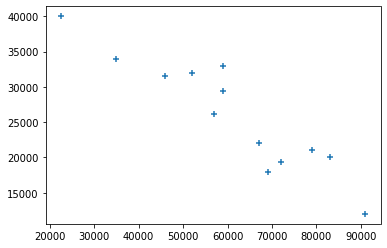

In [21]:
plt.scatter(df['Mileage'], df['Sell Price($)'], marker='+')

In [22]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [23]:
merged = pd.concat([df,dummies], axis='columns')

In [24]:
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [25]:
final = merged.drop(['Car Model', 'Mercedez Benz C class'], axis='columns')

In [26]:
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [27]:

x = final.drop( ['Sell Price($)'], axis='columns' )
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [28]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

In [32]:
model.predict([[86000,7,0,1]])

array([11080.74313219])

In [33]:
model.score(x,y)

0.9417050937281082

In [34]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [37]:
dff = df.drop(['Car Model'], axis='columns')

In [38]:
dff

,Mileage,Sell Price($),Age(yrs)
0,69000,18000,6
1,35000,34000,3
2,57000,26100,5
3,22500,40000,2
4,46000,31500,4
5,59000,29400,5
6,52000,32000,5
7,72000,19300,6
8,91000,12000,8
9,67000,22000,6


In [41]:
x = dff[['Mileage','Age(yrs)' ]]

In [42]:
y = dff[['Sell Price($)']]

In [43]:
x

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [44]:
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [45]:
from sklearn.model_selection import train_test_split


In [75]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2)

In [71]:
x_train

,Mileage,Age(yrs)
7,72000,6
5,59000,5
3,22500,2
10,83000,7
1,35000,3
0,69000,6
12,59000,5
9,67000,6
8,91000,8
11,79000,7


In [76]:
x_test

,Mileage,Age(yrs)
4,46000,4
12,59000,5
11,79000,7


In [77]:
y_train

,Sell Price($)
5,29400
8,12000
1,34000
0,18000
7,19300
6,32000
2,26100
3,40000
10,20000
9,22000


In [78]:
y_test

,Sell Price($)
4,31500
12,33000
11,21000
